# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [118]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

import numpy.random

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [37]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [3]:
census = table2.census / 1e9
census.shape

(67,)

In [4]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [5]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [6]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [39]:
table2.values

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814.0, 2995909000.0, nan

A `Series` does not have `columns`, but it does have `name`.

In [8]:
census.name

'census'

It contains `values`, which is an array.

In [9]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [10]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [11]:
type(table2)

pandas.core.frame.DataFrame

In [12]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [13]:
type(table2.columns)

pandas.core.indexes.base.Index

In [14]:
type(table2.values)

numpy.ndarray

In [15]:
type(census)

pandas.core.series.Series

In [16]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [17]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

In [18]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

Select `tables[1]`, which is the second table on the page.

In [11]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [12]:
table1.tail()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [13]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [14]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

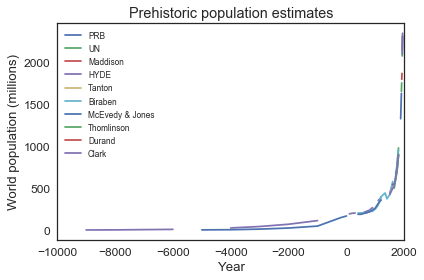

In [23]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

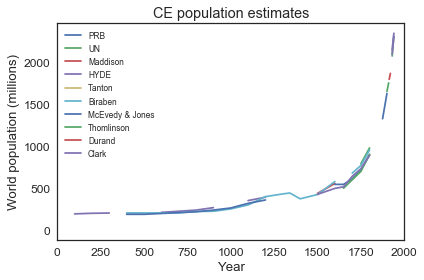

In [265]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

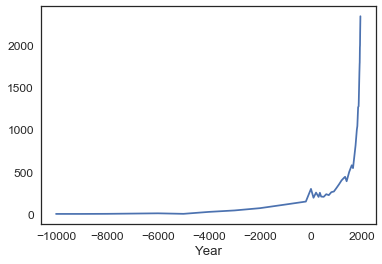

In [266]:
approx = table1.max(axis=1)
approx.plot()

In [51]:
approx[approx.index[approx.index >= 0]]

Year
1        300.0
100      195.0
200      256.0
300      205.0
350      254.0
400      209.0
500      206.0
600      237.0
700      226.0
800      261.0
900      269.0
1000     310.0
1100     353.0
1200     400.0
1250     416.0
1300     432.0
1340     443.0
1400     390.0
1500     500.0
1600     579.0
1650     545.0
1700     679.0
1750     814.0
1800    1000.0
1820    1042.0
1850    1265.0
1870    1276.0
1875    1325.0
1900    1668.0
1910    1777.0
1913    1793.0
1920    1968.0
1925    2000.0
1930    2145.0
1940    2340.0
dtype: float64

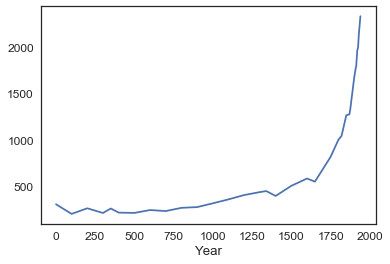

In [267]:
pop = approx[approx.index[approx.index >= 0]]
pop.plot()

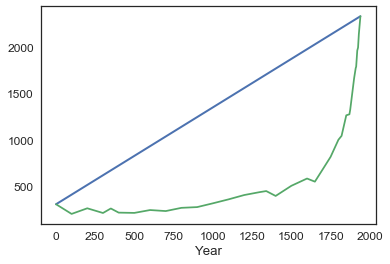

In [268]:
#update estimated annual_growth based on 1970 to 2016 census data
total_growth = pop[1940] - pop[1]
elapsed_time = 1940 - 1
annual_growth = total_growth/elapsed_time

results = TimeSeries()
results[1] = pop[1]

for t in linrange(1, 1940):
    results[t+1] = results[t] + annual_growth 

results.plot()
pop.plot()

The idea here is to use 

In [274]:
df_pop = pop.reset_index() #turn to dataframe from series
df_pop.columns = ['Year', 'Count']

In [276]:
results = TimeSeries()
growth_rates = TimeSeries()
for i in range(1, len(pop.index)-1): 
    year_diff = df_pop.iloc[i]['Year'] - df_pop.iloc[i-1]['Year']
    value_diff = df_pop.iloc[i]['Count'] - df_pop.iloc[i-1]['Count']
    annual_growth = value_diff/year_diff
    growth_rate = (value_diff/df_pop.iloc[i-1]['Count'])/year_diff
    results[i] = annual_growth
    growth_rates[i] = growth_rate

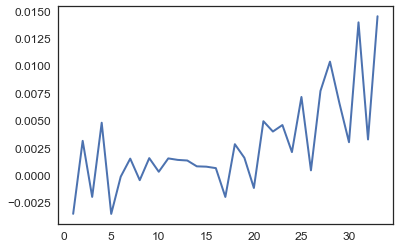

In [277]:
growth_rates.plot()

In [278]:
growth_rates.min()

-0.003543307086614173

In [279]:
growth_rates.max()

0.014499999999999999

In [288]:
def random_growth_rate():
    if flip(.9):
        return numpy.random.uniform(0, 0.0145)
    else:
        return numpy.random.uniform(-0.00354, 0)

In [289]:
data = TimeSeries()
data[1] = 300
numpy.random.seed(458)

for t in linrange(1, 1940):
    data[t+1] = data[t] +  data[t] * random_growth_rate()

In [290]:
pop_est = TimeSeries()
for i, row in df_pop.iterrows():
    pop_est[df_pop.iloc[i]['Year']] = data[df_pop.iloc[i]['Year']]

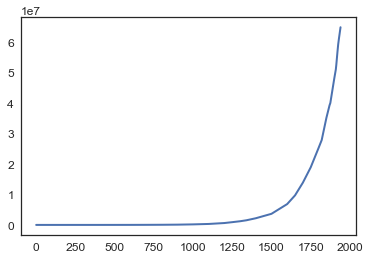

In [295]:
pop_est.plot()

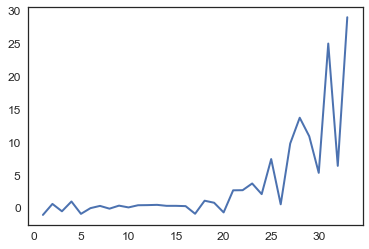

In [297]:
results.plot()

In [299]:
results.max()

29.0

In [300]:
results.min()

-1.0606060606060606

In [312]:
results.median()

0.55

In [303]:
diff_median = results - results.median()

1     -1.610606
2      0.060000
3     -1.060000
4      0.430000
5     -1.450000
6     -0.580000
7     -0.240000
8     -0.660000
9     -0.200000
10    -0.470000
11    -0.140000
12    -0.120000
13    -0.080000
14    -0.230000
15    -0.230000
16    -0.275000
17    -1.433333
18     0.550000
19     0.240000
20    -1.230000
21     2.130000
22     2.150000
23     3.170000
24     1.550000
25     6.883333
26     0.000000
27     9.250000
28    13.170000
29    10.350000
30     4.783333
31    24.450000
32     5.850000
33    28.450000
dtype: float64

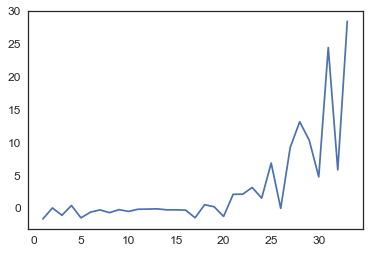

In [304]:
diff_median.plot()

In [305]:
diff_median.min()

-1.6106060606060606

In [306]:
diff_median.max()

28.45

In [308]:
def random_annual_growth():
    if flip(.5):
        return numpy.random.uniform(0,28.45)
    else:
        return numpy.random.uniform(-1.6106, 0)

In [313]:
data = TimeSeries()
data[1] = 300
numpy.random.seed(458)

for t in linrange(1, 1940):
    data[t+1] = data[t] + random_annual_growth() + results.median()

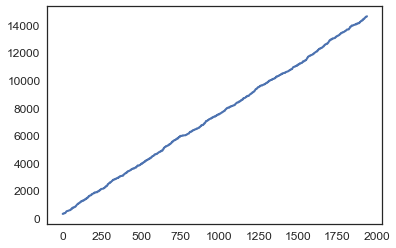

In [314]:
data.plot()